[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[['machine', 'learning', 'enables', 'computers', 'to', 'learn', 'from', 'data'], ['natural', 'language', 'processing', 'helps', 'machines', 'understand', 'human', 'language'], ['word', 'embeddings', 'represent', 'words', 'in', 'continuous', 'vector', 'space'], ['word2vec', 'learns', 'semantic', 'relationships', 'between', 'words'], ['nlp', 'techniques', 'are', 'widely', 'used', 'in', 'search', 'engines', 'and', 'chatbots']]
['in', 'words', 'language', 'chatbots', 'and', 'engines', 'search', 'used', 'widely', 'are']
[array([-5.3700025e-04,  2.3834752e-04,  5.1085846e-03,  9.0175914e-03,
       -9.3124015e-03, -7.1172463e-03,  6.4553972e-03,  8.9769606e-03,
       -5.0157206e-03, -3.7627371e-03,  7.3861931e-03, -1.5341323e-03,
       -4.5305775e-03,  6.5556923e-03, -4.8653013e-03, -1.8183757e-03,
        2.8806920e-03,  9.8743290e-04, -8.2896668e-03, -9.4537055e-03,
        7.3148427e-03,  5.0723092e-03,  6.7566526e-03,  7.6421548e-04,
        6.3511841e-03, -3.4038788e-03, -9.4838615e-0

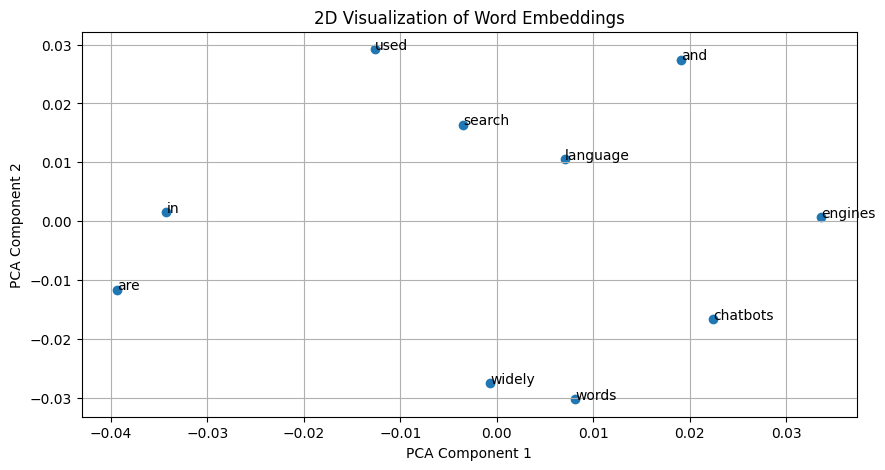

In [2]:
!pip install gensim scikit-learn matplotlib
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('punkt_tab') # Added to download the missing resource

# Sample corpus
corpus = [
    "Machine learning enables computers to learn from data",
    "Natural language processing helps machines understand human language",
    "Word embeddings represent words in continuous vector space",
    "Word2Vec learns semantic relationships between words",
    "NLP techniques are widely used in search engines and chatbots"
]

# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

model = Word2Vec.load("word2vec.model")

# Get vectors for a subset of words
words = list(model.wv.index_to_key)[:10]  # Select the first 10 words
print(words)
word_vectors = [model.wv[word] for word in words]
print(word_vectors)


from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

import matplotlib.pyplot as plt

# Plot the words in 2D space
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate the points with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()